In [78]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [79]:
df = load_iris()
dir(df)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [80]:
df = pd.DataFrame(df.data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [81]:
df.drop([0, 1], axis=1, inplace = True)
df.head()

,2,3
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [82]:
df.rename(columns={
    2 : 0,
    3 : 1
}, inplace=True)
df

,0,1
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


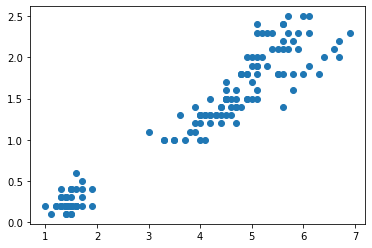

In [83]:
plt.scatter(df[0], df[1])

In [84]:
scaler = MinMaxScaler()

scaler.fit(df[[0]])
df[0] = scaler.transform(df[[0]])

scaler.fit(df[[1]])
df[1] = scaler.transform(df[[1]])

df.head()

,0,1
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


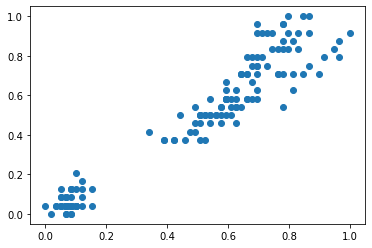

In [85]:
plt.scatter(df[0], df[1])

In [100]:
sse = []  # Sum of Squared error
k_rng = range(1, 14)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[[0]], df[[1]])
    sse.append(km.inertia_)

sse

C:\Users\Pradeep\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[13.338850904912368,
 1.9420778923288327,
 0.7084355277936203,
 0.36131890580612214,
 0.2581022957422285,
 0.17068102461845844,
 0.12271555792670412,
 0.09761380769786648,
 0.0744015986023015,
 0.06088449846751209,
 0.054110527268384244,
 0.04641589603821552,
 0.04080461608977755]

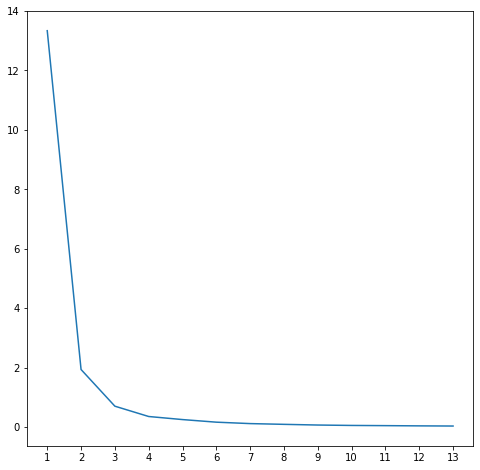

In [101]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_xticks(np.arange(1,14,1))
ax.plot(k_rng, sse)

In [102]:
km = KMeans(n_clusters=3)
y = km.fit_predict(df[[0]], df[[1]])
df['cluster'] = y
df

,0,1,cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,0
147,0.711864,0.791667,0
148,0.745763,0.916667,0


In [103]:
df['cluster'].unique()

array([1, 2, 0])

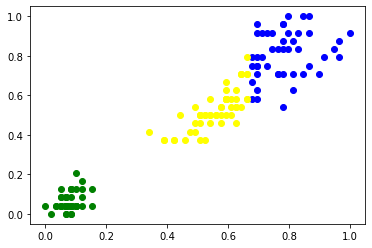

In [106]:
df_array = [0]*df['cluster'].unique().shape[0]
for i in range(df['cluster'].unique().shape[0]):
    df_array[i] = df[df.cluster == i]
colors = ['blue', 'green', 'yellow']
for i in range(len(df_array)):
    plt.scatter(df_array[i][0], df_array[i][1], color = colors[i])